# In which browsers are these reports running?
---
**This notebook answers the following questions**:
> - [X]Which browsers are most used by lighitining performance?
>
> - [X]What are the most used browser versions?


In [1]:
import pandas as pd

## Loading active reports and lightining page view
---

Active reports

In [2]:
active_reports = pd.read_csv('datasets/active_reports.csv', low_memory=False)

Lightining Page View

In [3]:
lgtn_performance= pd.read_csv('../data/Salesforce/ELF/LightningPerformance/2022-06-04_LightningPerformance.csv', low_memory=False)

In [4]:
lgtn_performance.drop(['EVENT_TYPE','TIMESTAMP','REQUEST_ID','USER_ID','USER_TYPE','TIMESTAMP_DERIVED'], inplace=True, axis=1)

### Let's relate the reports to Lighting performance as follows:
>- We'll look at the common columns between Lightning performance and active reports
>- We will remove columns that we will not use
---

Define [common columns](https://github.com/dell-splab/lightning-analysis/blob/research-questions/Data%20Discovery%20-%20MUST%20READ.ipynb) beteween both

In [5]:
common_columns = ['USER_ID_DERIVED', 'SESSION_KEY', 'LOGIN_KEY', 'ORGANIZATION_ID', 'CLIENT_IP']

Now let's merge tables

In [6]:
reports_performance = pd.merge(left=active_reports, right=lgtn_performance, on=common_columns)

Let's make a data frame with just the columns that involve the browsers

In [7]:
reports_browsers = reports_performance[['BROWSER_NAME', 'BROWSER_VERSION']]

In [8]:
reports_browsers

,BROWSER_NAME,BROWSER_VERSION
0,CHROME,102.0
1,CHROME,102.0
2,CHROME,102.0
3,CHROME,102.0
4,CHROME,102.0
...,...,...
723077,EDGE,102.0
723078,EDGE,102.0
723079,EDGE,102.0
723080,EDGE,102.0


#### Let's now create two views with these columns
---

Plot for the most used browser

In [9]:
import matplotlib.pyplot as plt

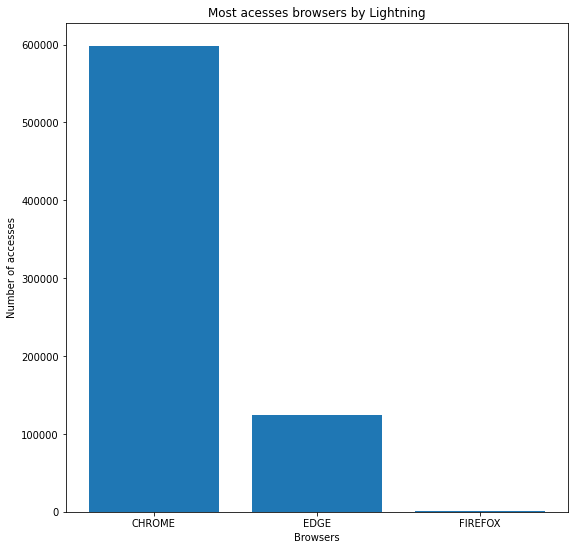

In [10]:
values = reports_browsers.BROWSER_NAME.value_counts()
labels = values.index

plt.figure(figsize=(9,9))
plt.bar(labels, values, 0.8)
plt.ylabel("Number of accesses")
plt.xlabel("Browsers")
plt.title("Most acesses browsers by Lightning")
plt.show()

Most browsers versions used

In [11]:
reports_browsers.value_counts(ascending=True)

BROWSER_NAME  BROWSER_VERSION
EDGE          101.0                   7
FIREFOX       91.0                  826
CHROME        100.0                1533
              92.0                 1695
EDGE          104.0                3078
CHROME        99.0                 3401
              101.0              111195
EDGE          102.0              120818
CHROME        102.0              480529
dtype: int64

Let's group by values by name and version

In [12]:
browsers_versions = reports_browsers.groupby(['BROWSER_NAME', 'BROWSER_VERSION']).agg({'BROWSER_VERSION': 'count'})

In [13]:
browsers_versions.reset_index

<bound method DataFrame.reset_index of                               BROWSER_VERSION
BROWSER_NAME BROWSER_VERSION                 
CHROME       92.0                        1695
             99.0                        3401
             100.0                       1533
             101.0                     111195
             102.0                     480529
EDGE         101.0                          7
             102.0                     120818
             104.0                       3078
FIREFOX      91.0                         826>

In [14]:
browsers_versions.rename(columns={'BROWSER_VERSION': 'COUNT_OF_VERSIONS'}, inplace = True)

Let's sort this values

In [15]:
browsers_versions.sort_values(by='COUNT_OF_VERSIONS', ascending=False)

COUNT_OF_VERSIONS
BROWSER_NAME BROWSER_VERSION                   
CHROME       102.0                       480529
EDGE         102.0                       120818
CHROME       101.0                       111195
             99.0                          3401
EDGE         104.0                         3078
CHROME       92.0                          1695
             100.0                         1533
FIREFOX      91.0                           826
EDGE         101.0                            7

In [16]:
browsers_versions.reset_index(inplace=True)

In [17]:
browsers_versions

,BROWSER_NAME,BROWSER_VERSION,COUNT_OF_VERSIONS
0,CHROME,92.0,1695
1,CHROME,99.0,3401
2,CHROME,100.0,1533
3,CHROME,101.0,111195
4,CHROME,102.0,480529
5,EDGE,101.0,7
6,EDGE,102.0,120818
7,EDGE,104.0,3078
8,FIREFOX,91.0,826


Let's make a list of unique browsers name

In [18]:
browsers = browsers_versions.BROWSER_NAME.unique().tolist()
browsers

['CHROME', 'EDGE', 'FIREFOX']

In [19]:
list_of_counts = browsers_versions.COUNT_OF_VERSIONS.tolist()
list_of_counts

[1695, 3401, 1533, 111195, 480529, 7, 120818, 3078, 826]

Let's define a function for make a dict of values and versions per browser name

In [20]:
def make_dict_of_browsers(list_of_browsers, list_of_counts, list_of_versions):
    result = {}
    for browser in list_of_browsers:
        result[browser] = []
        for i in range(len(list_of_counts)):
            if browser == browsers_versions.BROWSER_NAME.get(i):
                result[browser].append(list_of_counts[i])
    return result
                

In [21]:
dict_of_browsers = make_dict_of_browsers(browsers, browsers_versions.COUNT_OF_VERSIONS.tolist(), browsers_versions.BROWSER_VERSION.tolist())
dict_of_browsers

{'CHROME': [1695, 3401, 1533, 111195, 480529],
 'EDGE': [7, 120818, 3078],
 'FIREFOX': [826]}

In [22]:
dict_of_versions = make_dict_of_browsers(browsers, browsers_versions.BROWSER_VERSION.tolist(), browsers_versions.COUNT_OF_VERSIONS.tolist())
dict_of_versions

{'CHROME': [92.0, 99.0, 100.0, 101.0, 102.0],
 'EDGE': [101.0, 102.0, 104.0],
 'FIREFOX': [91.0]}

---


## Let's make a plots for each browser
---


### Calls using Chrome

In [23]:
import numpy as np

In [24]:
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(len(dict_of_versions['CHROME']))*2)
wp = { 'linewidth' : 1, 'edgecolor' : "white" } 
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n({:d} g)".format(pct, absolute)

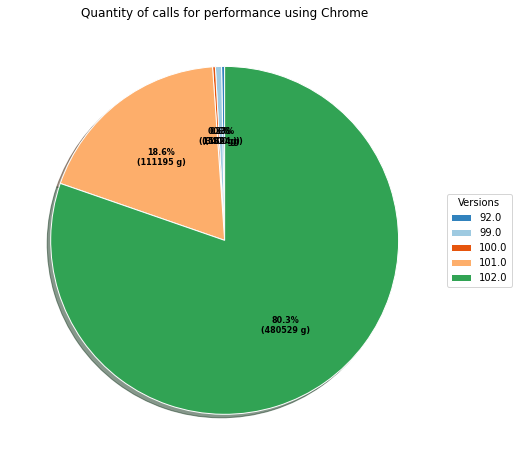

In [25]:
fig, ax = plt.subplots(figsize =(12, 8))

wedges, texts, autotexts = ax.pie(dict_of_browsers['CHROME'],
                                  autopct = lambda pct: func(pct, dict_of_browsers['CHROME']), 
                                  shadow = True, 
                                  colors = outer_colors, 
                                  startangle = 90, 
                                  wedgeprops = wp, 
                                  textprops = dict(color ="black")) 

ax.legend(wedges, browsers_versions.BROWSER_VERSION[0:5], 
          title ="Versions", 
          loc ="center left", 
          bbox_to_anchor =(1, 0, 0.5, 1)) 

plt.setp(autotexts, size = 8, weight ="bold") 
ax.set_title("Quantity of calls for performance using Chrome") 
plt.show()

### Calls using Microsoft Edge

In [26]:
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(len(dict_of_versions['EDGE']))*2)
wp = { 'linewidth' : 1, 'edgecolor' : "white" } 
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n({:d} g)".format(pct, absolute)

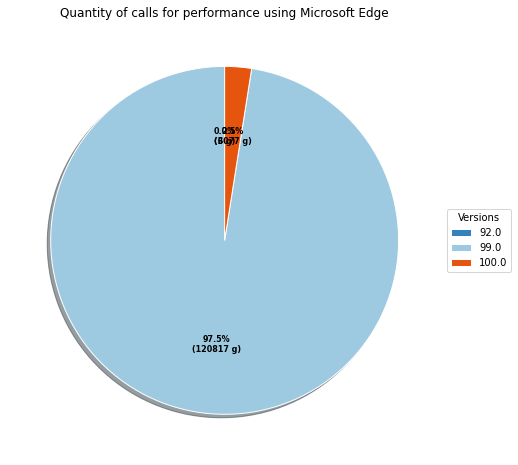

In [27]:
fig, ax = plt.subplots(figsize =(12, 8))

wedges, texts, autotexts = ax.pie(dict_of_browsers['EDGE'],
                                  autopct = lambda pct: func(pct, dict_of_browsers['EDGE']), 
                                  shadow = True, 
                                  colors = outer_colors, 
                                  startangle = 90, 
                                  wedgeprops = wp, 
                                  textprops = dict(color ="black")) 

ax.legend(wedges, browsers_versions.BROWSER_VERSION[0:5], 
          title ="Versions", 
          loc ="center left", 
          bbox_to_anchor =(1, 0, 0.5, 1)) 

plt.setp(autotexts, size = 8, weight ="bold") 
ax.set_title("Quantity of calls for performance using Microsoft Edge") 
plt.show()

### Calls using Firefox

In [28]:
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(len(dict_of_versions['FIREFOX']))*2)
wp = { 'linewidth' : 1, 'edgecolor' : "white" } 
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n({:d} g)".format(pct, absolute)

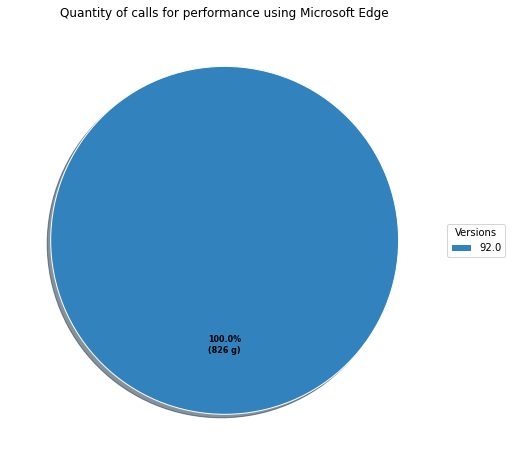

In [29]:
fig, ax = plt.subplots(figsize =(12, 8))

wedges, texts, autotexts = ax.pie(dict_of_browsers['FIREFOX'],
                                  autopct = lambda pct: func(pct, dict_of_browsers['FIREFOX']), 
                                  shadow = True, 
                                  colors = outer_colors, 
                                  startangle = 90, 
                                  wedgeprops = wp, 
                                  textprops = dict(color ="black")) 

ax.legend(wedges, browsers_versions.BROWSER_VERSION[0:5], 
          title ="Versions", 
          loc ="center left", 
          bbox_to_anchor =(1, 0, 0.5, 1)) 

plt.setp(autotexts, size = 8, weight ="bold") 
ax.set_title("Quantity of calls for performance using Firefox") 
plt.show()